# 분류(classification), 검출(detection), 분할(segmentation)

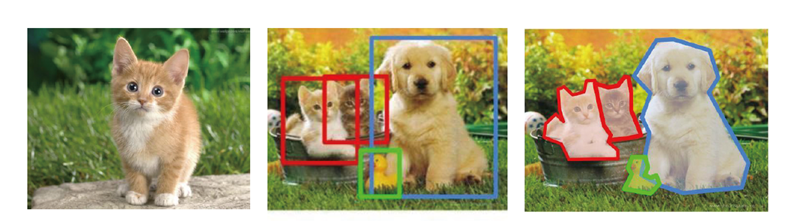

비전 주요 모델 및 알고리즘

- R-CNN
- Fast R-CNN
- Faster R-CNN
- YOLO(you only look once)

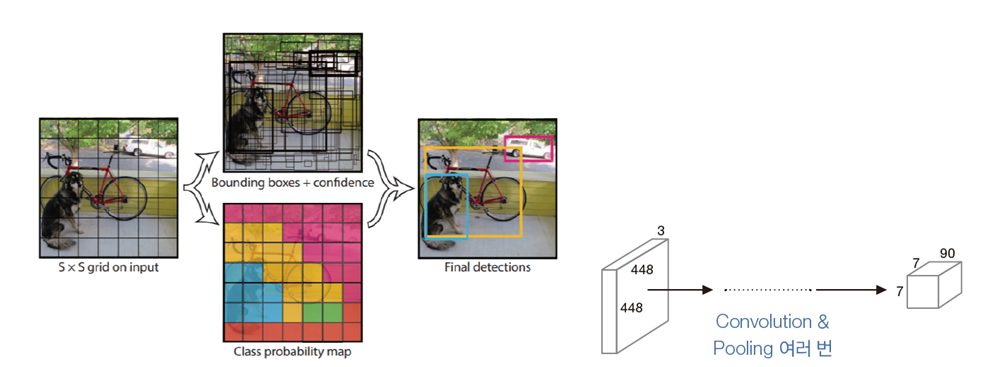

In [1]:
import matplotlib.pyplot as plt

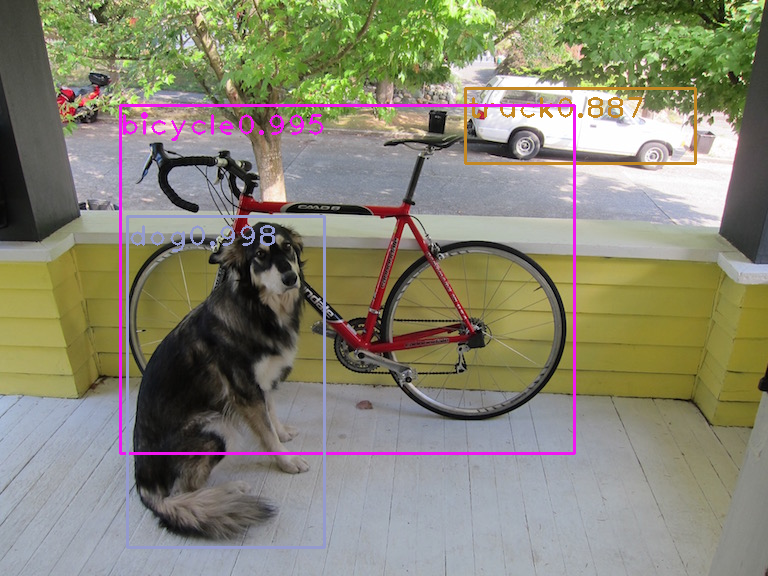

In [2]:
import numpy as np
import cv2
classes = []
# 욜로는 ms coco 데이셋에 대해 학습  80개의 부류 이름을 읽어 옴
with open('/content/drive/MyDrive/machinelearning/yolo5_data/coco.names.txt','r') as f:
  classes =  [line.strip() for line in f.readlines()]
  colors = np.random.uniform(0,255,size=(len(classes),3))
  # print(colors.shape)
  # 탐지할 테스트 이미지
  img = cv2.imread('/content/drive/MyDrive/machinelearning/yolo5_data/yolo_test.jpg')
  height,width,channels = img.shape
  # 입력형식을 yolo형태로 변경 (배치,채널,가로,세로) -> (1, 3, 448, 448)
  blob = cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)
  # 모델 불러오기
  yolo_model = cv2.dnn.readNet('/content/drive/MyDrive/machinelearning/yolo5_data/yolov3.weights',
                  '/content/drive/MyDrive/machinelearning/yolo5_data/yolov3.cfg')
  layer_names = yolo_model.getLayerNames()
  # [200 227 254]
  out_layers =  [layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers() ]

  # 테스트 영상을 신경망에 입력
  yolo_model.setInput(blob)
  # 출력
  output3 = yolo_model.forward(out_layers)
  class_ids, confidences, boxes = [],[],[]
  for output in output3:  # 3 개
    for vec in output:
      scores =  vec[5:]  # 확률 점수만 획득
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.5:  # 확률이 0.5를 넘는 바운딩 박스를 모음
        # 취합한 박스들의 정보중에 중심좌표를 획득
        centerx, centery = int(vec[0]*width),int(vec[1]*height)
        w,h = int(vec[2]*width),int(vec[3]*height)
        x,y = int(centerx-w/2), int(centery-h/2)
        boxes.append([x,y,w,h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
  # 박스주위에 잔상이나 그런형태의 박스를 배제하기위해서 가장 적합한 확률의 박스만 남긴다
  indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
  # 살아남은 박스를 영상에 표시
  for i in range(len(boxes)):
    if i in indexes:
      x,y,w,h = boxes[i]
      text = str(classes[class_ids[i]]) +'%0.3f'%confidences[i]
      cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
      cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)

  # 구글 코렙에서 사용할때는
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)

  # 로컬에서 사용할때
  # cv2.imshow("Object detection",img)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
